# ML Model for Predicting Ships Crew Size
#### The excercise comes from this web-page: https://pub.towardsai.net/jupyter-notebook-for-data-science-coding-exercise-393d66ef353a
#### Forked from: https://github.com/bot13956/ML_Model_for_Predicting_Ships_Crew_Size 


## Introduction

The take-home challenge problem or coding exercise is the most important step in the data scientist interview process. This is generally a data science problem e.g., machine learning model, linear regression, classification problem, time series analysis, etc. Some coding challenge problems would specify that a formal project report is submitted together with a Jupyter notebook or R Script file. In this article, we present a sample Jupyter notebook for a take-home challenge problem.

## Project Instructions

This coding exercise should be performed in python (which is the programming language used by the team). You are free to use the internet and any other libraries. Please save your work in a Jupyter notebook and email it to us for review.

Data file: cruise_ship_info.csv (this file will be emailed to you)

Objective: Build a regressor that recommends the “crew” size for potential ship buyers. Please do the following steps (hint: use numpy, scipy, pandas, sklearn and matplotlib)

1. Read the file and display columns.

2. Calculate basic statistics of the data (count, mean, std, etc.) and examine data and state your observations.

3. Select columns that will probably be important to predict “crew” size.

4. If you removed columns, explain why you removed those.

5. Use one-hot encoding for categorical features.

6. Create training and testing sets (use 60% of the data for the training and reminder for testing).

7. Build a machine learning model to predict the ‘crew’ size.

8. Calculate the Pearson correlation coefficient for the training set and testing data sets.

9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.

10. What is regularization? What is the regularization parameter in your model?

11. Plot regularization parameter value vs. Pearson correlation for the test and training sets, and see whether your model has a bias problem or variance problem.

## Project Solution
#### 1. Read the file and display the columns

In [38]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib widget

In [39]:
cruise = pd.read_csv('cruise_ship_info.csv')

In [40]:
# Displaying column names
print(cruise.columns)
# Display head of the df
cruise.head()

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')


,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


#### 2. Calculate basic statistics of the data (count, mean, std, etc.) and examine data and state your observations.

In [41]:
# Summary table with basic statistics
cruise.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [42]:
cruise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


C:\Users\macko\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


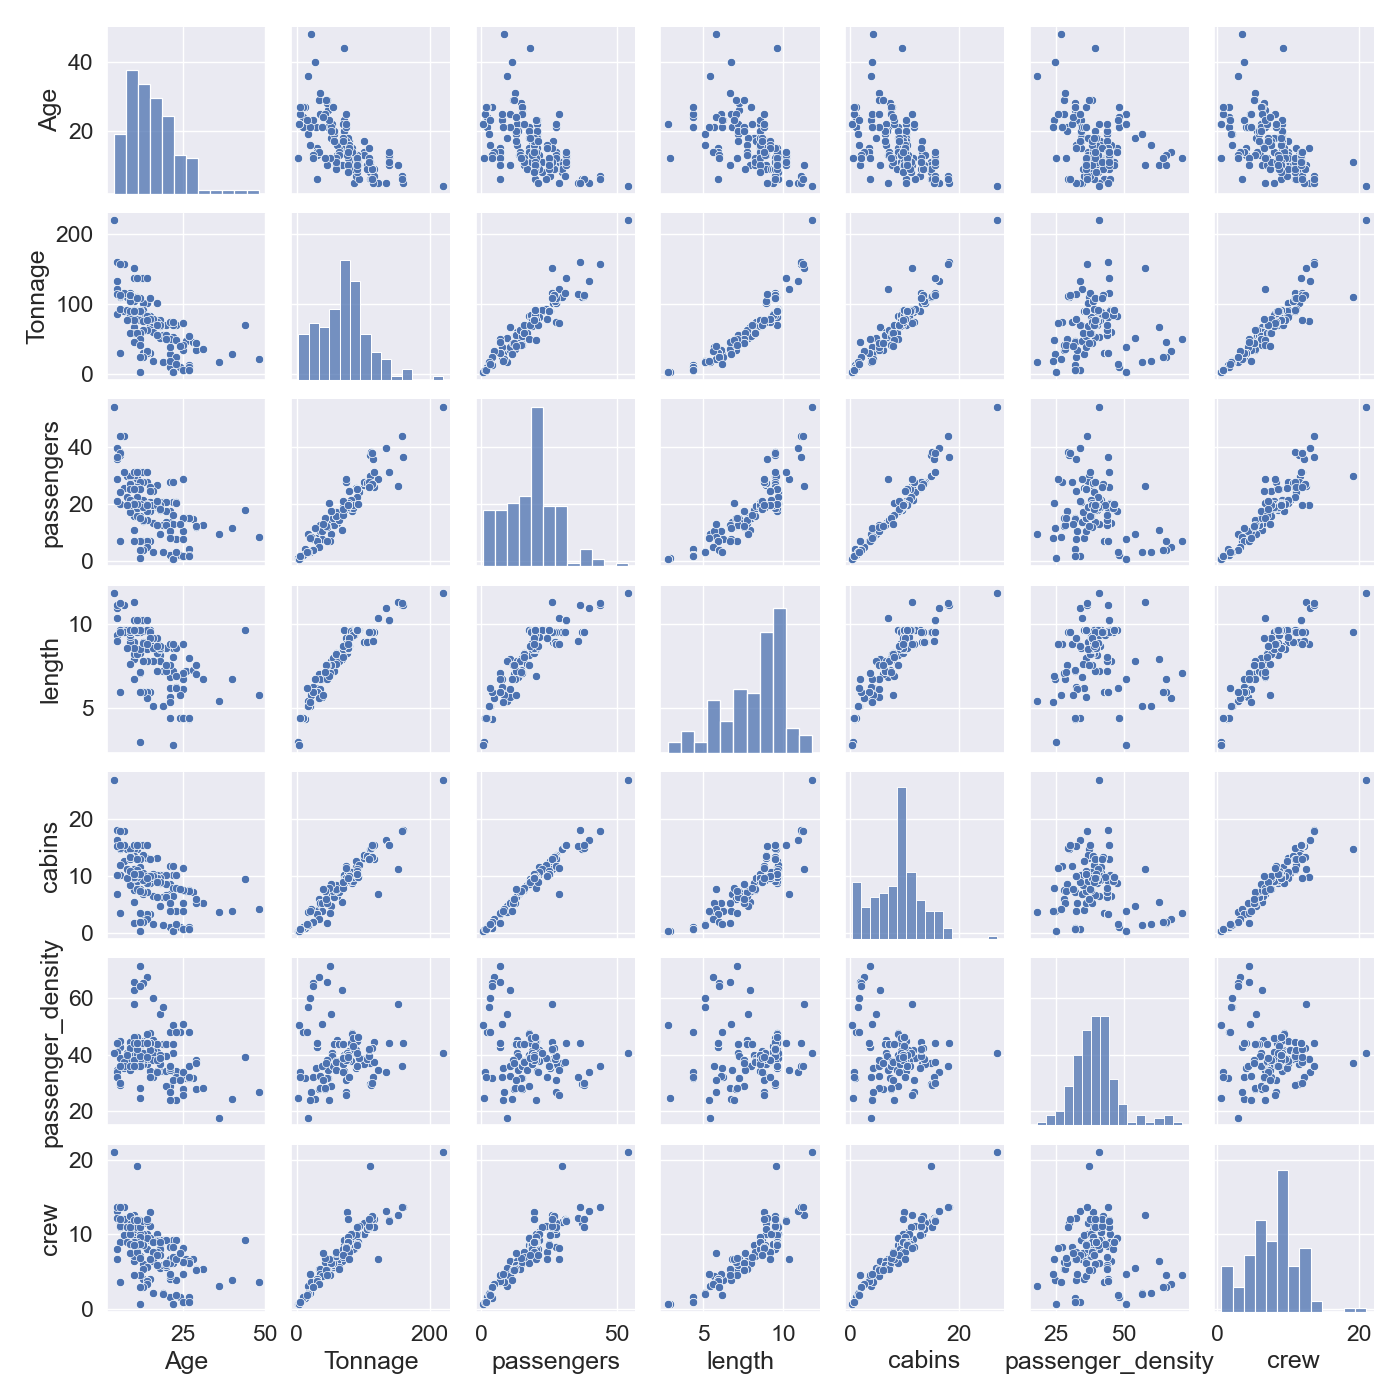

In [43]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew']
sns.pairplot(cruise[cols], size=2.0)

In [44]:
cruise['Cruise_line'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Oceania               3
Seabourn              3
Windstar              3
Cunard                3
Disney                2
Crystal               2
Azamara               2
Orient                1
Name: Cruise_line, dtype: int64

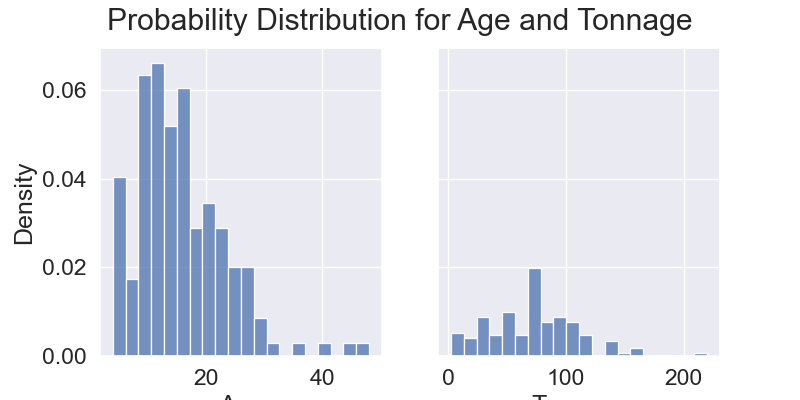

In [45]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (8,4))

sns.histplot(cruise['Age'], stat='density', bins=20, ax=ax0)
sns.histplot(cruise['Tonnage'], stat='density', bins=20, ax=ax1)
fig.suptitle('Probability Distribution for Age and Tonnage')
plt.show()

Observations
- the most common cruise line is royal caribbean
- The dataset consists of 9 columns, 2 categorical, the rest numerical (int -age and the rest floats).
- There are no NaN values across the dataset
- AGE: In the entire dataset, the maximum age of the ship is 48, the minimum age is 4, and the mean is 15.68
- TONNAGE: In the entire dataset, the maximum tonnage of the ship is 220t, the minimum tonnage is 2.32t, and the mean tonnage is 71.28 t
- From the pairplot we can see there is a correlation between the target variable (crew) and Tonnage, passengers, length, and cabins

#### 3. Select columns that will probably be important to predict “crew” size.
#### 4. If you removed columns, explain why you removed those.

In [46]:
cruise.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

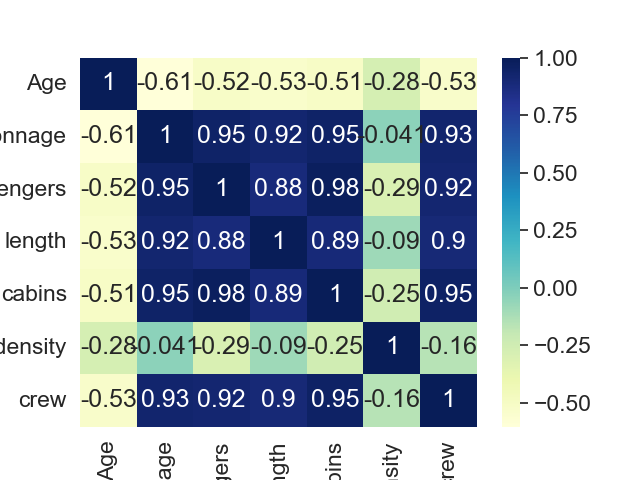

In [47]:
columns = ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew']
fig, ax = plt.subplots()
sns.heatmap(cruise[columns].corr(), cmap='YlGnBu', annot=True)
plt.show()

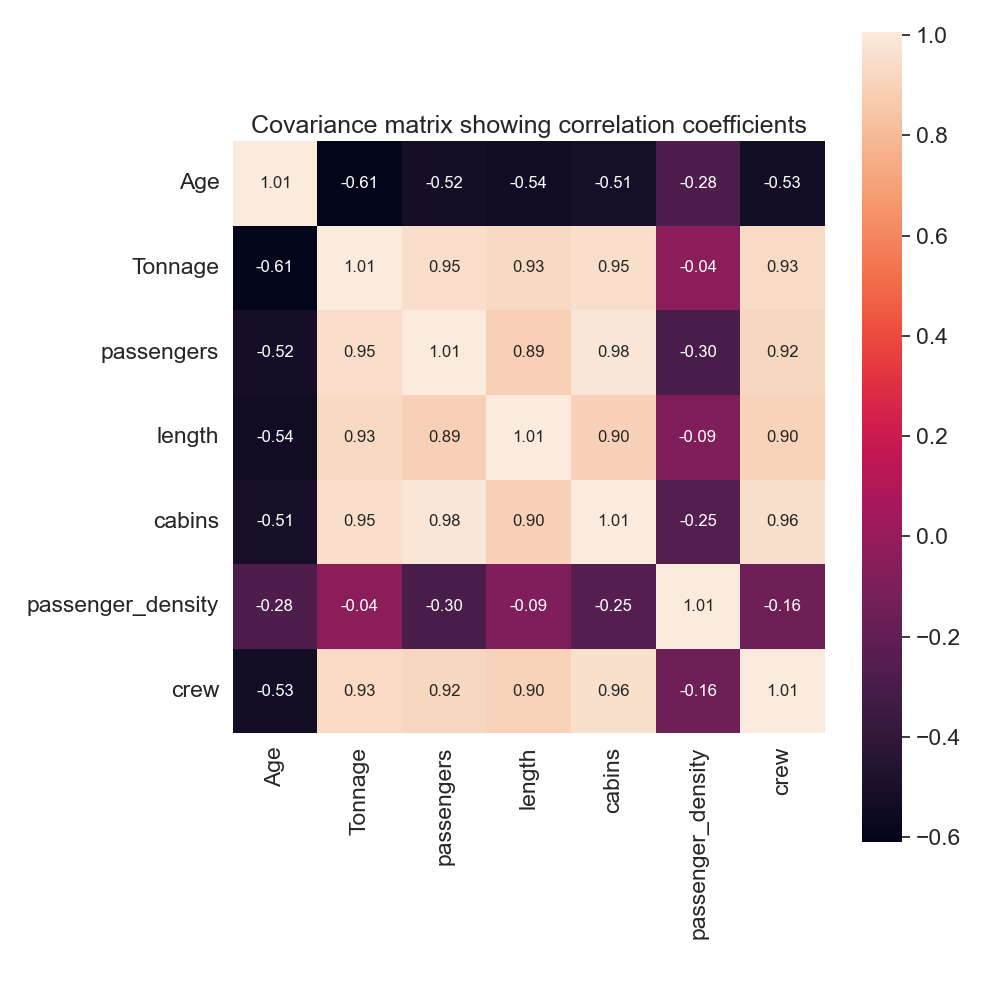

In [48]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_std = stdsc.fit_transform(cruise[columns].iloc[:,range(0,7)].values)


cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=columns,
                 xticklabels=columns)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

Observations:
- from the heatmap we can see that crew is correlated with cabins, length, passengers and tonnage.
- the strongest correlation is observed for the 'cabins' variable

In [49]:
df_model = cruise[['Tonnage', 'passengers', 'length', 'cabins', 'crew']]
df_model

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00
...,...,...,...,...,...
153,3.341,0.66,2.79,0.33,0.59
154,76.800,19.60,8.79,9.67,12.00
155,5.350,1.58,4.40,0.74,0.88
156,5.350,1.67,4.40,0.74,0.88


#### 5. Use one-hot encoding for categorical features.

In [50]:
#  One-hot encoding 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Select the columns to be one-hot encoded
cols_to_transform = ['Ship_name', 'Cruise_line']
df_with_dummies = pd.get_dummies(cruise, columns=cols_to_transform, prefix=cols_to_transform)

df_with_dummies

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,12.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1


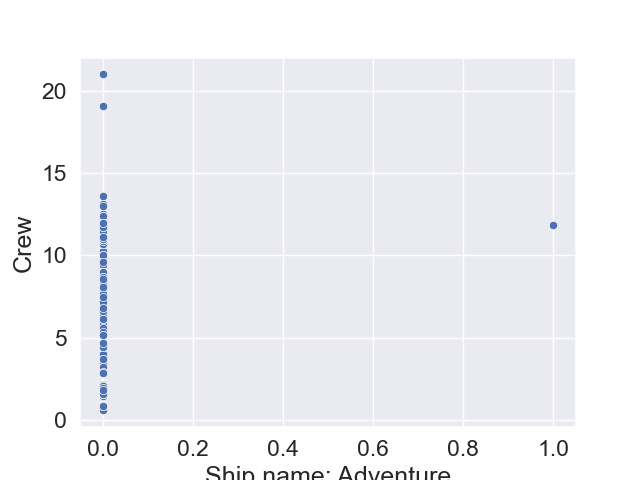

In [51]:
fig, ax = plt.subplots()

sns.scatterplot(x='Ship_name_Adventure',
                y='crew',
                data= df_with_dummies,
                ax=ax)

ax.set(xlabel = 'Ship name: Adventure')
ax.set(ylabel = 'Crew')
plt.show()

In [52]:
print(df_with_dummies[df_with_dummies['Ship_name_Adventure'] == 1]['crew'])
df_with_dummies['crew'].iloc[119]

119    11.85
Name: crew, dtype: float64


11.85

### Observations from part 5

In order to build a simplified regression model, we shall focus only on ordinal features. The categorical features "Ship_name"	and "Cruise_line" will not be used. A simple model built using only the 4 ordinal features "Tonnage", "passengers", "length, and "cabins" will be simple to interpret.

#### 6. Create training and testing sets (use 60% of the data for the training and reminder for testing).

In [53]:
# Split the data into train and test in 80/20 proportion
from sklearn.model_selection import train_test_split

df_model = cruise[['Tonnage', 'passengers', 'length', 'cabins', 'crew']]
df_model

X = df_model.iloc[:,0:4].values    # features matrix 
y = df_model['crew'].values        # target variable

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

(158, 4) (158,)


#### 7. Build a machine learning model to predict the ‘crew’ size.

In [54]:
# Linear regression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()

# Build training model
model.fit(X_train, y_train)

# Apply trained model to make predition (on the 40% of the data)
y_pred = model.predict(X_test)

#### 8. Calculate the Pearson correlation coefficient for the training set and testing data sets.

9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.

10. What is regularization? What is the regularization parameter in your model?

11. Plot regularization parameter value vs. Pearson correlation for the test and training sets, and see whether your model has a bias problem or variance problem.

In [55]:
# Prediction Results
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'           #rounding to two digits
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' #rounding to two digits
      % r2_score(y_test, y_pred))

Coefficients: [ 0.01465413 -0.1655983   0.53957742  0.74634808]
Intercept: -1.2870597169388178
Mean squared error (MSE): 1.36
Coefficient of determination (R^2): 0.91


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

# Initialize two StandardScaler objects, one for X and one for y
sc_y = StandardScaler()
sc_x = StandardScaler()

# Create empty arrays to store the training and testing scores
train_score = np.array([])
test_score = np.array([])

# Loop 10 times to perform the same operations multiple times
for i in range(10):
    # Split the X and y arrays into training and testing sets for each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)

    # Scale the y training data
    y_train_std = sc_y.fit_transform(y_train.reshape(-1, 1))

    # Initialize a pipeline object that performs standardization, PCA, and linear regression
    pipe_lr = Pipeline([
        ('scl', StandardScaler()), # Standardize the data
        ('pca', PCA(n_components=4)), # Perform PCA
        ('slr', LinearRegression()) # Perform linear regression
    ])

    # Fit the pipeline to the X training data and y training data
    pipe_lr.fit(X_train, y_train_std)

    # Predict the y training data and y testing data
    y_train_pred_std = pipe_lr.predict(X_train)
    y_test_pred_std = pipe_lr.predict(X_test)

    # Reverse the scaling of the y training and testing data
    y_train_pred = sc_y.inverse_transform(y_train_pred_std)
    y_test_pred = sc_y.inverse_transform(y_test_pred_std)

    # Append the R^2 scores of the predictions to the train_score and test_score arrays
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))


In [57]:
train_score

array([0.92028261, 0.91733937, 0.94839385, 0.93899476, 0.90621451,
       0.91156903, 0.92726066, 0.94000795, 0.93922948, 0.93629554])

In [58]:
test_score

array([0.92827978, 0.93807946, 0.8741834 , 0.89901199, 0.94781315,
       0.91880183, 0.91437408, 0.89660876, 0.90427477, 0.90139208])

In [59]:
print('R2 train: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))

R2 train: 0.929 +/- 0.013


In [60]:
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

R2 test: 0.912 +/- 0.021


#### Observations from 8.

The train_score and test_score arrays store the R^2 scores of the linear regression model's predictions on the training and testing data respectively, for each of the 10 iterations.

The R^2 score is a measure of the goodness of fit of a regression model, where 1.0 indicates a perfect fit, and 0.0 means the model is no better than a horizontal line. In other words, it measures how well the model fits the observed data.

The results stored in train_score and test_score can be interpreted as an estimation of the generalization performance of the model, since it measures the model's performance on data that it has not seen before (the test data).

Reusing the results stored in train_score and test_score would depend on what the goal of the analysis is. For example, you could compute the mean and standard deviation of the test scores to see how consistent the model's performance is across different random states, or you could use the results to choose the best iteration (i.e., the one with the highest test score).

## Regression model but in Keras

In [61]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train_score = np.array([])
test_score = np.array([])

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)

    # Initialize a sequential model
    model = tf.keras.models.Sequential()
    # Add a dense layer to the model
    model.add(tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],)))
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    # Predict on the training and testing data
    y_train_pred = model.predict(X_train).flatten()
    y_test_pred = model.predict(X_test).flatten()
    # Append the R^2 scores to the arrays
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))

2/2 [==============================] - 0s 1ms/step


In [63]:
train_score

array([  -0.44548352,  -83.3390876 , -303.34914119,   -9.14395718,
       -126.69299917, -108.83667103,    0.89879591,  -44.02494175,
       -137.35626851,   -4.77952126])

In [64]:
test_score

array([-3.38270396e-01, -1.48464499e+02, -3.93262210e+02, -7.01907140e+00,
       -1.84366221e+02, -1.57663238e+02,  8.59066174e-01, -3.43467212e+01,
       -9.64525243e+01, -5.73560355e+00])